# Project: Wrangling and Analyze Data

### Table Of Contents:
1. Data Gathering
2. Assessing Data
3. Cleaning Data
4. Storing Data
5. Analysis and Visualization


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline

In [2]:
twitter_df = pd.read_csv('twitter_archive_enhanced.csv', sep= ',')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
import os
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Making a directory if it doesn't already exist
folder_name = 'image_predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

#### Confirming Directory just created

In [6]:
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
#using image predictions dataframe as df_ip
image_df = pd.read_csv('image-predictions.tsv', sep = '\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
import tweepy
import json
from timeit import default_timer as timer 
from tweepy import OAuthHandler

CONSUMER_KEY = 'confidential'
CONSUMER_SECRET = 'confidential'
OAUTH_TOKEN = 'confidential'
OAUTH_TOKEN_SECRET = 'confidential'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth_handler=auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)


In [9]:
# tweet_ids = twitter_df.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [10]:
#Reading the Json files into texts and reading each tweet_id line by line 
df_list = [] 

with open('tweet_json.txt', 'r', encoding= 'utf-8') as tweet_data:
    for line in tweet_data:
        data = (json.loads(line))
        tweet_id = data['id']
        created_at = data['created_at']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        
        # Append to list of dictionaries
        df_list.append({'tweet_id' : tweet_id,
               
                'date_created' : created_at,
               
                'favorite_count' : favorite_count,
               
                'retweet_count' : retweet_count })
              
            
API_df = pd.DataFrame(df_list, columns = ['tweet_id', 'date_created', 'favorite_count', 'retweet_count'])


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
# Assessing the three different datasets visually  
# WeRateDogs Twitter Archive Data
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
#checking for duplicated tweets
twitter_df.duplicated().sum()

0

In [13]:
#checking programmatically 
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Assessing TWeet image prediction dataset visually
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_df.duplicated().sum()

0

In [16]:
# Assessing Tweet image prediction programmatically
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# Assessing additional data gotten from querying twitter API visually
API_df

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33697,6969
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29222,5272
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,21978,3464
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36791,7191
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35182,7717
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,17749,2586
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,10331,1647
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,56670,15679
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,24427,3604
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,27848,6068


In [18]:
#checking for any duplicate values
API_df.duplicated().sum()

0

In [19]:
#Assessing additional data gotten from querying twitter API visually programmatically
API_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id          2327 non-null int64
date_created      2327 non-null object
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


### Quality issues
1.column 'retweeted_status_user_id' and name is not descriptive enough

2.There are retweets in the dataframe.

3.columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp, source, text, expanded_url, 'jpg_url', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date_created') are of little or no importance.

4.False predictions in the image prediction dataframe indicates predictions contain animals other than dogs

5.p1, p1_conf, p1_dog are not descriptive enough

6.Datas contained in the 'timestamp'  not in the right format 

7.Name column in the twitter_archive dataset contains incosistent data

8.Dog names are inconsistent

### Tidiness issues
1.The dog "stage" (i.e. doggo, floofer, pupper, and puppo) should be one column

2.Rating should be a single column instead of two 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
twitter_df_clean = twitter_df.copy(deep = True)
API_df_clean = API_df.copy(deep = True)
image_df_clean = image_df.copy(deep =  True)

In [21]:
twitter_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #1: columns 'retweeted_status_user_id' and 'name' is not descriptive enough

#### Define: column "retweeted_status_user_id" and "name" is renamed to "retweet_id" and "dog_name" respectivly to make it descriptive.

#### Code

In [22]:
twitter_df_clean  = twitter_df_clean.rename(columns={"retweeted_status_user_id" : "retweet_id", "name" : "dog_name"})


#### Test

In [23]:
twitter_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweet_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Issue #2: There are retweets in the dataframe.

#### Define: There are retweets in the dataset, and we do not need them as we only need original tweets. Hence I mask the retweet column to only contain rows that are null for the retweet column

#### Code

In [24]:
twitter_df_clean =twitter_df_clean[twitter_df_clean['retweet_id'].isna()]

#### Test

In [25]:
twitter_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweet_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [26]:
twitter_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweet_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'dog_name', 'doggo', 'floofer', 'pupper',
       'puppo'],
      dtype='object')

### Issue #3: There are some irrelevant columns

#### Define: The columns: 'in_reply_to_status_id',	'in_reply_to_user_id', 'source', 'text', 'retweeted_status_id', 'retweeted_status_timestamp', 'expanded_urls' are not useful for our analysis, hence they are dropped

####  Code

In [27]:
import numpy as np
idx = np.r_ [1:3, 4:7, 8:10]
twitter_df_clean.drop(twitter_df_clean.columns[idx], axis= 1, inplace= True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Test

In [28]:
twitter_df_clean.head()

,tweet_id,timestamp,retweet_id,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,NaN,12,10,Franklin,None,None,None,None


In [29]:
twitter_df_clean.columns

Index(['tweet_id', 'timestamp', 'retweet_id', 'rating_numerator',
       'rating_denominator', 'dog_name', 'doggo', 'floofer', 'pupper',
       'puppo'],
      dtype='object')

The "date_created"  column will be deleted in the twitter API dataset.

#### Code

In [30]:
API_df_clean = API_df_clean.drop(columns={"date_created"})

#### Test

In [31]:
API_df_clean

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33697,6969
1,892177421306343426,29222,5272
2,891815181378084864,21978,3464
3,891689557279858688,36791,7191
4,891327558926688256,35182,7717
5,891087950875897856,17749,2586
6,890971913173991426,10331,1647
7,890729181411237888,56670,15679
8,890609185150312448,24427,3604
9,890240255349198849,27848,6068


#The columns ('jpg_url', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog') are dropped from the image prediction dataset because they're irrelevant

#### Code

In [32]:
#Drop ('jpg_url', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog') column

idx = np.r_ [1:2, 6:12]
image_df_clean.drop(image_df_clean.columns[idx], axis= 1, inplace= True)


#### Test

In [33]:
image_df_clean

,tweet_id,img_num,p1,p1_conf,p1_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,redbone,0.506826,True
2,666033412701032449,1,German_shepherd,0.596461,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,1,miniature_pinscher,0.560311,True
5,666050758794694657,1,Bernese_mountain_dog,0.651137,True
6,666051853826850816,1,box_turtle,0.933012,False
7,666055525042405380,1,chow,0.692517,True
8,666057090499244032,1,shopping_cart,0.962465,False
9,666058600524156928,1,miniature_poodle,0.201493,True


### Issue #4 : The dog "stage" (i.e. doggo, floofer, pupper, and puppo) should be one column

#### Define: Make one column that includes the type of dog "stages" and rename it dog_stages

#### Code

In [34]:
twitter_df_clean['dog_stages'] = twitter_df_clean[
    ['doggo', 'floofer','pupper','puppo']].apply(lambda x: ', '.join(x), axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
twitter_df_clean = twitter_df_clean.replace(regex=r'(None,? ?)', value='').replace(regex=r'(, $)', value='')

In [36]:
twitter_df_clean = twitter_df_clean.replace(regex=r'', value= np.nan)

In [37]:
twitter_df_clean.drop(columns = ['doggo', 'floofer','pupper','puppo'], inplace = True)

idx = np.r_ [-4:]
twitter_df_clean.drop(twitter_df_clean.columns[idx], axis= 1, inplace= True)

#### Test

In [38]:
twitter_df_clean

,tweet_id,timestamp,retweet_id,rating_numerator,rating_denominator,dog_name,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,NaN,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,NaN,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,NaN,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,NaN,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,NaN,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,NaN,13,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,NaN,13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,NaN,13,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,NaN,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,NaN,14,10,Cassie,doggo


### Issue #5 : Rating should be a single column

#### Define : Numerator and Denominator used for the ratings should be placed on a single column

#### Code

In [39]:
# Combining two columns and giving it a new column "rating"  

twitter_df_clean["rating"] = twitter_df_clean["rating_numerator"].map(str) + twitter_df_clean["rating_denominator"].map(str)

In [40]:
# In the resulting dataframe, we will delete the "rating_denominator" and "rating_numerator" columns because we do not need them anymore
twitter_df_clean = twitter_df_clean.drop(columns={"rating_numerator", "rating_denominator"})

#### Test

In [41]:
twitter_df_clean

,tweet_id,timestamp,retweet_id,dog_name,dog_stages,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,NaN,Phineas,NaN,1310
1,892177421306343426,2017-08-01 00:17:27 +0000,NaN,Tilly,NaN,1310
2,891815181378084864,2017-07-31 00:18:03 +0000,NaN,Archie,NaN,1210
3,891689557279858688,2017-07-30 15:58:51 +0000,NaN,Darla,NaN,1310
4,891327558926688256,2017-07-29 16:00:24 +0000,NaN,Franklin,NaN,1210
5,891087950875897856,2017-07-29 00:08:17 +0000,NaN,NaN,NaN,1310
6,890971913173991426,2017-07-28 16:27:12 +0000,NaN,Jax,NaN,1310
7,890729181411237888,2017-07-28 00:22:40 +0000,NaN,NaN,NaN,1310
8,890609185150312448,2017-07-27 16:25:51 +0000,NaN,Zoey,NaN,1310
9,890240255349198849,2017-07-26 15:59:51 +0000,NaN,Cassie,doggo,1410


### Issue #6: Data contained in the 'timestamp' not in the right format

#### Define: Timestamp data shows what time each tweet was made, but we do not need so much information about the time, hence  extract just the date from it and rename the column "date"

#### Code

In [42]:
twitter_df_clean[['date', 'time', 'mins']] = twitter_df_clean['timestamp'].str.split(' ', expand=True)

In [43]:
# In the resulting dataframe, we would be deleting: "timestamp", "time", and "mins" columns because we do not need them anymore

twitter_df_clean = twitter_df_clean.drop(columns={"timestamp", "time", "mins"})

#### Test

In [44]:
twitter_df_clean

,tweet_id,retweet_id,dog_name,dog_stages,rating,date
0,892420643555336193,NaN,Phineas,NaN,1310,2017-08-01
1,892177421306343426,NaN,Tilly,NaN,1310,2017-08-01
2,891815181378084864,NaN,Archie,NaN,1210,2017-07-31
3,891689557279858688,NaN,Darla,NaN,1310,2017-07-30
4,891327558926688256,NaN,Franklin,NaN,1210,2017-07-29
5,891087950875897856,NaN,NaN,NaN,1310,2017-07-29
6,890971913173991426,NaN,Jax,NaN,1310,2017-07-28
7,890729181411237888,NaN,NaN,NaN,1310,2017-07-28
8,890609185150312448,NaN,Zoey,NaN,1310,2017-07-27
9,890240255349198849,NaN,Cassie,doggo,1410,2017-07-26


In [45]:
image_df_clean

,tweet_id,img_num,p1,p1_conf,p1_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,redbone,0.506826,True
2,666033412701032449,1,German_shepherd,0.596461,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,1,miniature_pinscher,0.560311,True
5,666050758794694657,1,Bernese_mountain_dog,0.651137,True
6,666051853826850816,1,box_turtle,0.933012,False
7,666055525042405380,1,chow,0.692517,True
8,666057090499244032,1,shopping_cart,0.962465,False
9,666058600524156928,1,miniature_poodle,0.201493,True


In [46]:
image_df_clean.columns

Index(['tweet_id', 'img_num', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

### Issue #7: False predictions in the image prediction dataframe indicates predictions contain animals other than dogs

#### Define: clean dataframe to contain only predictions that are dogs

#### Code

In [47]:
image_df_clean = image_df_clean.loc[image_df_clean['p1_dog'] != False]

#### Test

In [48]:
image_df_clean 

,tweet_id,img_num,p1,p1_conf,p1_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,redbone,0.506826,True
2,666033412701032449,1,German_shepherd,0.596461,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,1,miniature_pinscher,0.560311,True
5,666050758794694657,1,Bernese_mountain_dog,0.651137,True
7,666055525042405380,1,chow,0.692517,True
9,666058600524156928,1,miniature_poodle,0.201493,True
10,666063827256086533,1,golden_retriever,0.775930,True
11,666071193221509120,1,Gordon_setter,0.503672,True


### Issue#8: Columns are not descriptive

#### Define: Rename p1, p1_conf, p1_dog to a more descriptive name

#### Code

In [49]:
image_df_clean = image_df_clean.rename(columns = {'p1' : 'dog_breed', 'p1_conf' : 'confidence_percentage', 'p1_dog' : 'prediction'})

#### Test

In [50]:
image_df_clean

,tweet_id,img_num,dog_breed,confidence_percentage,prediction
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,redbone,0.506826,True
2,666033412701032449,1,German_shepherd,0.596461,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,1,miniature_pinscher,0.560311,True
5,666050758794694657,1,Bernese_mountain_dog,0.651137,True
7,666055525042405380,1,chow,0.692517,True
9,666058600524156928,1,miniature_poodle,0.201493,True
10,666063827256086533,1,golden_retriever,0.775930,True
11,666071193221509120,1,Gordon_setter,0.503672,True


In [51]:
twitter_df_clean.sample(5)

,tweet_id,retweet_id,dog_name,dog_stages,rating,date
1752,678969228704284672,NaN,Lola,NaN,1110,2015-12-21
99,872967104147763200,NaN,NaN,doggo,1210,2017-06-09
104,872261713294495745,NaN,Harry,NaN,1310,2017-06-07
1795,677314812125323265,NaN,Tassy,NaN,1010,2015-12-17
621,796116448414461957,NaN,NaN,NaN,1110,2016-11-08


### Issue#9: Name column in the twitter_archive dataset contains incosistent data

#### Define: Change inconsistent names to 'None'

#### Code

In [52]:
twitter_df_clean.loc[twitter_df.name.str.islower(),'dog_name'] = None
twitter_df_clean.dog_name.replace(regex=r'None', value= np.nan, inplace = True)

#### Test

In [53]:
twitter_df_clean

,tweet_id,retweet_id,dog_name,dog_stages,rating,date
0,892420643555336193,NaN,Phineas,NaN,1310,2017-08-01
1,892177421306343426,NaN,Tilly,NaN,1310,2017-08-01
2,891815181378084864,NaN,Archie,NaN,1210,2017-07-31
3,891689557279858688,NaN,Darla,NaN,1310,2017-07-30
4,891327558926688256,NaN,Franklin,NaN,1210,2017-07-29
5,891087950875897856,NaN,NaN,NaN,1310,2017-07-29
6,890971913173991426,NaN,Jax,NaN,1310,2017-07-28
7,890729181411237888,NaN,NaN,NaN,1310,2017-07-28
8,890609185150312448,NaN,Zoey,NaN,1310,2017-07-27
9,890240255349198849,NaN,Cassie,doggo,1410,2017-07-26


### Issue#10: Dogs breeds are inconsistent

#### Define: Separator in the 'dog_breed' column should be replaced with space

#### Code

In [54]:
image_df_clean.dog_breed = image_df_clean.dog_breed.replace(
    regex=r'(_)', value=' ').str.title()

#### Test

In [55]:
image_df_clean

,tweet_id,img_num,dog_breed,confidence_percentage,prediction
0,666020888022790149,1,Welsh Springer Spaniel,0.465074,True
1,666029285002620928,1,Redbone,0.506826,True
2,666033412701032449,1,German Shepherd,0.596461,True
3,666044226329800704,1,Rhodesian Ridgeback,0.408143,True
4,666049248165822465,1,Miniature Pinscher,0.560311,True
5,666050758794694657,1,Bernese Mountain Dog,0.651137,True
7,666055525042405380,1,Chow,0.692517,True
9,666058600524156928,1,Miniature Poodle,0.201493,True
10,666063827256086533,1,Golden Retriever,0.775930,True
11,666071193221509120,1,Gordon Setter,0.503672,True


### Merging all the 3 dataframes together

In [56]:
dfs = [twitter_df_clean, image_df_clean, API_df_clean]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id', how='inner'), dfs)

In [57]:
twitter_archive_master.head(3)

,tweet_id,retweet_id,dog_name,dog_stages,rating,date,img_num,dog_breed,confidence_percentage,prediction,favorite_count,retweet_count
0,892177421306343426,NaN,Tilly,NaN,1310,2017-08-01,1,Chihuahua,0.323581,True,29222,5272
1,891815181378084864,NaN,Archie,NaN,1210,2017-07-31,1,Chihuahua,0.716012,True,21978,3464
2,891327558926688256,NaN,Franklin,NaN,1210,2017-07-29,2,Basset,0.555712,True,35182,7717


In [58]:
# checking for null values in just created master dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 0 to 1468
Data columns (total 12 columns):
tweet_id                 1469 non-null int64
retweet_id               0 non-null float64
dog_name                 1037 non-null object
dog_stages               227 non-null object
rating                   1469 non-null object
date                     1469 non-null object
img_num                  1469 non-null int64
dog_breed                1469 non-null object
confidence_percentage    1469 non-null float64
prediction               1469 non-null bool
favorite_count           1469 non-null int64
retweet_count            1469 non-null int64
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 139.2+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing Data

In [60]:
# The most liked Dog stage 
twitter_archive_master.groupby(['dog_stages'], as_index= False)['favorite_count', 'retweet_count'].agg('mean')

,dog_stages,favorite_count,retweet_count
0,doggo,18930.978723,6401.382979
1,"doggo, floofer",14801.000000,2784.000000
2,"doggo, pupper",12565.875000,3606.875000
3,"doggo, puppo",41814.000000,16076.000000
4,floofer,11178.714286,3959.857143
5,pupper,6940.111111,2060.402778
6,puppo,20315.842105,5390.684211


In [61]:
twitter_name = twitter_archive_master.groupby(['dog_name'], as_index= False)['favorite_count', 'retweet_count'].agg('mean')
twitter_name.head()

,dog_name,favorite_count,retweet_count
0,Abby,4174.0,1099.5
1,Ace,3117.0,955.0
2,Acro,1012.0,264.0
3,Adele,2858.0,661.0
4,Aiden,1386.0,559.0


In [62]:
# Getting the most liked name of dog
top_name = twitter_name.sort_values(by= ['favorite_count', 'retweet_count'], ascending= False)
top_name.head()

,dog_name,favorite_count,retweet_count
645,Stephan,111198.0,51426.0
320,Jamesy,108499.0,30058.0
208,Duddles,92504.0,37265.0
5,Aja,69047.0,15734.0
406,Lilly,62249.0,15364.0


In [63]:
# Most popular dog breed
twitter_archive_master.groupby(['dog_breed']).favorite_count.sum().sort_values(ascending=False)

dog_breed
Golden Retriever               1470148
Labrador Retriever              907059
Pembroke                        864393
Chihuahua                       596063
Samoyed                         446309
French Bulldog                  407286
Chow                            352193
Pug                             270198
Cocker Spaniel                  267086
Pomeranian                      263559
Eskimo Dog                      226389
Cardigan                        221058
Malamute                        216139
Chesapeake Bay Retriever        206228
Toy Poodle                      201768
Lakeland Terrier                186422
German Shepherd                 172265
Miniature Pinscher              162260
Basset                          154331
Great Pyrenees                  152031
Shetland Sheepdog               130852
Staffordshire Bullterrier       126521
English Springer                120589
Siberian Husky                  119187
Italian Greyhound               118355
Rottweiler     

### Insights:
1.From the dataset, we can draw the conclusion that doggo dog stage has the highest popularity.

2.The most liked name of dog is Stephan.

3.The most popular dog is the golden_retriever

### Visualization

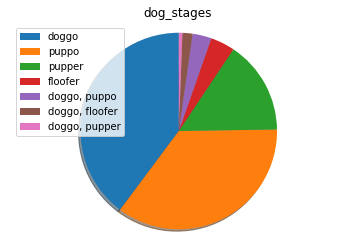

In [64]:
labels = twitter_archive_master.dog_stages.unique().tolist()[1:]
sizes = twitter_archive_master.groupby(['dog_stages']).favorite_count.sum().sort_values(ascending=False).tolist()
# plt.bar(labels, values, width=10)
#To set the title


fig1, ax1 = plt.subplots()
ax1.pie(sizes,shadow=True, startangle=90)

plt.legend(labels)
plt.title('dog_stages')
ax1.axis('equal')

plt.show()

From the visualization above, it is conclusive to say doggo has the is the most liked dog stage amongst the various dog stages